In [2]:
import numpy as np;
import matplotlib.pyplot as plt;

%matplotlib inline

# Simulating Particle Motion with Bezier Curves

In [33]:
class BezierCurve:
    def __init__(self, p0, p1, p2):
        '''
            Quadratic Bezier Curve Formulation
            in 2 dimensions
        '''
        self.p0 = p0
        self.p1 = p1
        self.p2 = p2
    def getPositions(self, t):
        '''
            Parameters:
            -----------
                t: N array where it represents the input to throw into Bezier Curve
            Returns:
            --------
                output: Nx2 array of positions where first row is x and second row is y
            
            Description:
            ------------
                Just plugging in the positional equation of Bezier Curve
        '''
        return (1-t)*( (1-t)*self.p0 + t*self.p1 ) + t*( (1-t)*self.p1 + t*self.p2 )
    def getDerivative(self, t):
        '''
            Parameters:
            -----------
                t: N array where it represents the input to throw into Bezier Curve
            Returns:
            --------
                output: Nx2 array of derivatives where first row is x and second row is y
            
            Description:
            ------------
                Just plugging in the derivative equation of Bezier Curve
        '''
        return 2*(1-t)*(self.p1-self.p0)+2*t*(self.p2-self.p1)
    def getDoubleDerivative(self, t):
        '''
            Parameters:
            -----------
                t: N array where it represents the input to throw into Bezier Curve
            Returns:
            --------
                output: Nx2 array of double derivatives where first row is x and second row is y
            
            Description:
            ------------
                Just plugging in the second derivative equation of Bezier Curve
        '''
        val = 2*(self.p2 - 2*self.p1 + self.p0)
        arr = np.zeros(shape=(2,t.shape[0]), dtype=float)
        arr[0,:] = val[0,:]
        arr[1,:] = val[1,:]
        return arr
    def getSpeed(self, t):
        '''
            Parameters:
            -----------
                t: N array where it represents the input to throw into Bezier Curve
            Returns:
            --------
                output: Nx1 array of general speed of the curve
            
            Description:
            ------------
                Plugging in Derivative and then taking its L2-norm
        '''
        derivatives = self.getDerivative(t)
        speed = np.linalg.norm(derivatives,axis=0)
        return speed
        
    def curvature(self, t):
        '''
            Parameters:
            -----------
                t: N array where it represents the input to throw into Bezier Curve
            Returns:
            --------
                output: Nx1 array of the curvature of the curve
            
            Description:
            ------------
                getting curvature using derivative and second derivative (must derive later)
        '''
        derivatives = self.getDerivative(t)
        derivatives_2 = self.getDoubleDerivative(t)
        #can vectorize please?
        curvature = []
        for i in range(t.shape[0]):
            mtx = np.vstack( (derivatives[:,i], derivatives_2[:,i]) ).T
            det = np.linalg.det(mtx)
            length = np.linalg.norm(derivatives[:,i])**3
            curvature.append( det/length )
        return np.array(curvature)

### Given 3 points $P_0$, $P_1$, and $P_2$ make a Bezier Curve

The idea is that our robot will follow this bezier curve. Its velocity will be the parametric velocity of the space curve, and its curvature will be the curvature of the space curve at time $t$ <br><br>

Bezier Curve will be represented as:
$$B(t) = (1-t)[ (1-t)P_0 + tP_1] + t[ (1-t)P_1 + tP_2]$$
<br>
Its Derivative is represented as:
$$B'(t) = 2(1-t)(P_1-P_0)+2t(P_2-P_1)$$
<br>
Its double Derivative is represented as:
$$B''(t) = 2(P_2-2P_1+P_0)$$
<br>
The curvature of Bezier Curve is:
$$ r(t) = \frac{det(B'(t),B''(t))}{||B'(t)||^3} $$

In [34]:
p0 = np.array([[0,0]]).T
p1 = np.array([[5,0]]).T
p2 = np.array([[0,10]]).T

bezier = BezierCurve(p0,p1,p2)
t = np.linspace(0,1,200)
positions = bezier.getPositions(t)

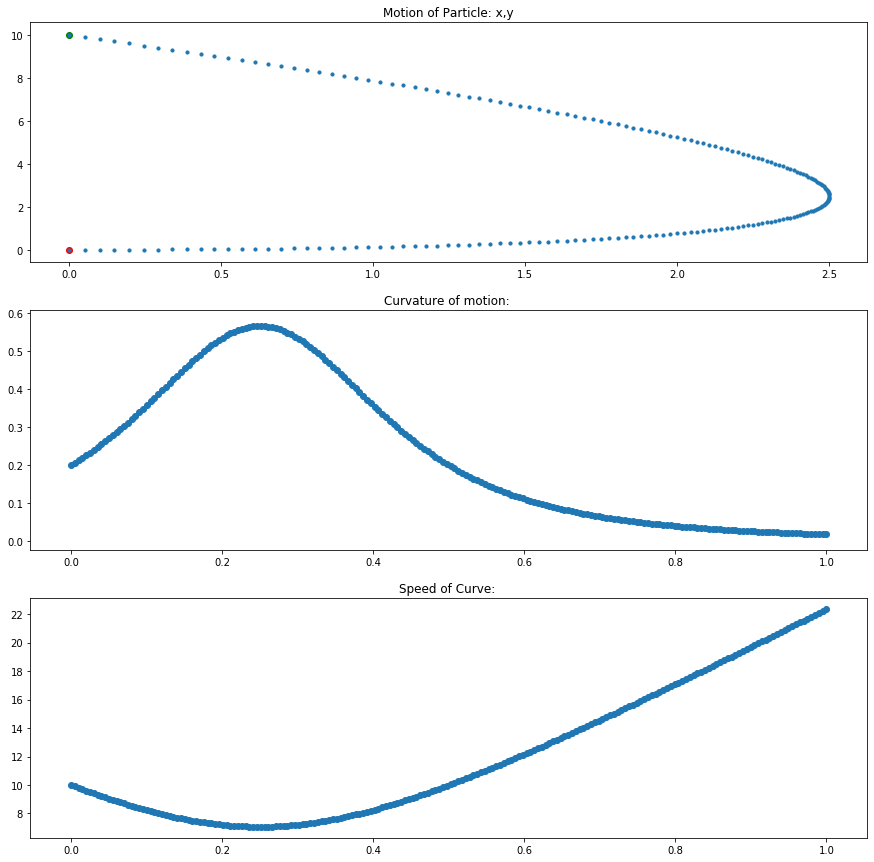

In [35]:

plt.figure(figsize=(15, 15))
plt.subplot(3,1,1)
plt.title('Motion of Particle: x,y')
plt.scatter(p0[0,:], p0[1,:], color='red') # red start
plt.scatter(p2[0,:], p2[1,:], color='green') # green end
plt.scatter(positions[0,:], positions[1,:],s=10)

plt.subplot(3,1,2)
plt.title('Curvature of motion: ')
plt.scatter(t,bezier.curvature(t))

plt.subplot(3,1,3)
plt.title('Speed of Curve: ')
plt.scatter(t, bezier.getSpeed(t))

plt.show()

In [36]:
def getDifferentialDrive(speed, curvature, track_radius=1):
    left_speed = speed * (2 - track_radius * curvature)/2
    right_speed = speed * (2 + track_radius * curvature) / 2
    return left_speed, right_speed
def angularVelocity(speed, curvature, track_radius=1):
    return speed*curvature

In [37]:
l,r = getDifferentialDrive(bezier.getSpeed(t), bezier.curvature(t), track_radius=10)
w = angularVelocity(bezier.getSpeed(t), bezier.curvature(t))

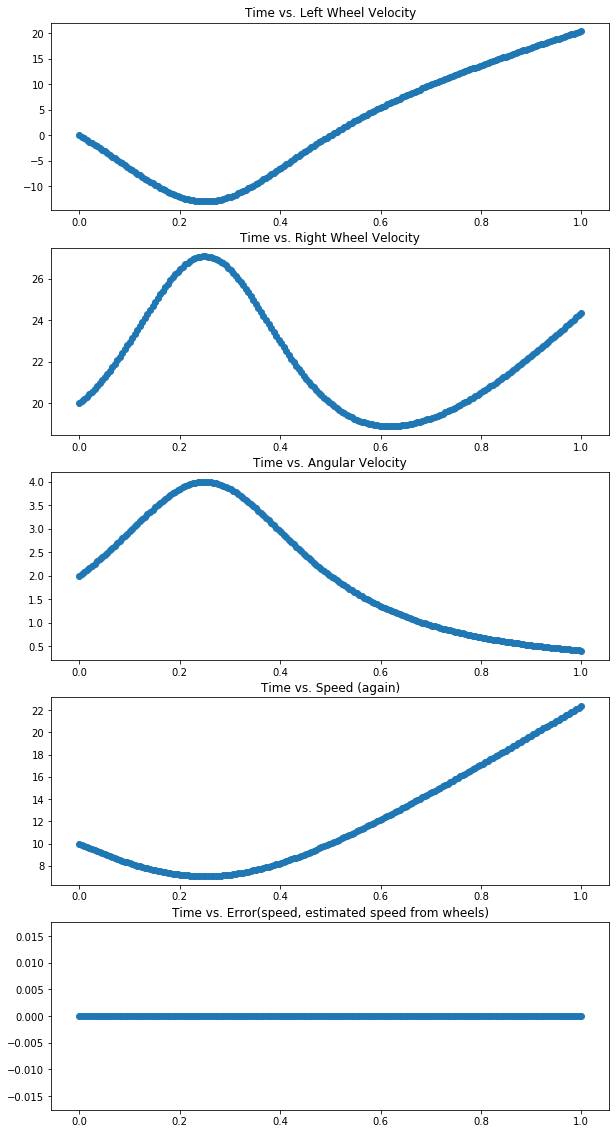

In [38]:
plt.figure(figsize=(10, 20))
plt.subplot(5,1,1)
plt.title('Time vs. Left Wheel Velocity')
plt.scatter(t,l)

plt.subplot(5,1,2)
plt.title('Time vs. Right Wheel Velocity')
plt.scatter(t,r)

plt.subplot(5,1,3)
plt.title('Time vs. Angular Velocity')
plt.scatter(t,w)

plt.subplot(5,1,4)
plt.title('Time vs. Speed (again)')
plt.scatter(t, (l+r)/2)

plt.subplot(5,1,5)
plt.title('Time vs. Error(speed, estimated speed from wheels)')
plt.scatter(t, bezier.getSpeed(t) - (l+r)/2)

plt.show()

In [ ]:
~